In [ ]:
!pip install jmetalpy


In [ ]:
# COLAB SETUP
github_token = input("Enter github token:")
!git clone -v https://{github_token}@github.com/GloomyC/JmetalSocial.git
%cd JmetalSocial

In [1]:
from jmetal.algorithm.singleobjective import GeneticAlgorithm
from jmetal.operator import SBXCrossover, RandomSolutionSelection, PolynomialMutation, NullMutation
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.problem.singleobjective.unconstrained import Rastrigin

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from jmetalpy_social.algorithm import *
from jmetalpy_social.operator import *
from jmetalpy_social.problem import *

In [4]:
D = 100
problem = AckleyProblem(D)

regular_mutation = PolynomialMutation(probability=1/D, distribution_index=20)

base_kwargs={
    "problem": problem,
    "population_size": 200,
    "mating_pool_size": 20,
    "offspring_population_size": 140,
    "crossover": SBXCrossover(probability=1.0, distribution_index=20),
    "selection": RandomSolutionSelection(),
    "termination_criterion": StoppingByEvaluations(max_evaluations=120),
    "keep_parents": True,
}

#ALG 1
algorithm1 = ObservedPaperAlgorithm(
    mutation=regular_mutation,
    **base_kwargs
)

#ALG 2
algorithm2 = ObservedPaperAlgorithm(
    mutation=IndependantMutations(
        [
        PolynomialMutation(probability=1/D, distribution_index=20),
        ExclusiveMutations(
            [
            FollowBestMutation(
                probability=1.0,
                tracked_best_count=5),
            ],
            [0.4],
        ),
        ]
    ),
    **base_kwargs
)

#ALG 3
algorithm3 = ObservedPaperAlgorithm(
    mutation=IndependantMutations(
        [
        PolynomialMutation(probability=1/D, distribution_index=20),
        ExclusiveMutations(
            [
            FollowBestSharedGenesMutation(
                probability=1.0,
                tracked_best_count=5,
                copy_genes_count=D//4),
            ],
            [0.4],
        ),
        ]
    ),
    **base_kwargs
)


In [5]:
algorithm3.run() 
algorithm2.run()
algorithm1.run()


100%|████████████████████████████████████████| 120/120 [00:16<00:00,  7.32it/s]


In [6]:
h1 = algorithm1.history
h2 = algorithm2.history
h3 = algorithm3.history

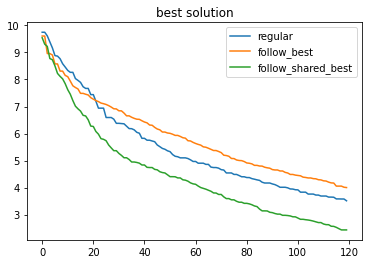

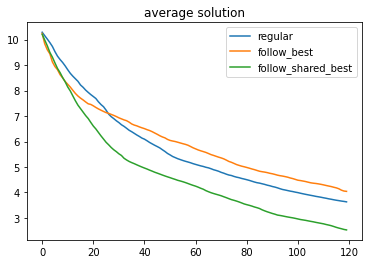

In [7]:
plt.figure()
plt.title("best solution")
plt.plot(h1["best"])
plt.plot(h2["best"])
plt.plot(h3["best"])
plt.legend(["regular","follow_best", "follow_shared_best"])

plt.figure()
plt.title("average solution")
plt.plot(h1["average"])
plt.plot(h2["average"])
plt.plot(h3["average"])
plt.legend(["regular","follow_best", "follow_shared_best"])
